<a href="https://colab.research.google.com/github/p82maavd/Metaheuristicas/blob/main/Practica1Metaheuristica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1

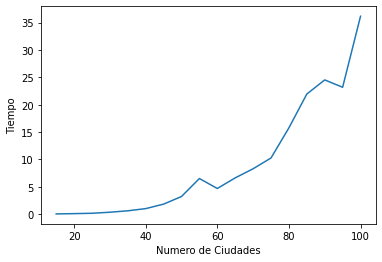

In [ ]:
import random
import time
import matplotlib.pyplot as plt

def generador(nCiudades):
    tsp = []
    for i in range(nCiudades):
        distancias = []
        for j in range(nCiudades):
            if j == i:
                distancias.append(0)
            elif j < i:
                distancias.append(tsp[j][i])
            else:
                distancias.append(random.randint(10, 1000))
        tsp.append(distancias)
    return tsp

def evaluarSolucion(datos, solucion):
    longitud = 0
    for i in range(len(solucion)):
        longitud += datos[solucion[i - 1]][solucion[i]]
    return longitud

def obtenerMejorVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    l=len(solucion)
    for i in range(l):
        for j in range(i+1, l):
            n = solucion.copy()
            n[i] = solucion[j]
            n[j] = solucion[i]
            vecinos.append(n)

    ##Obtención del mejor vecino
    mejorVecino = vecinos[0]
    mejorLongitud = evaluarSolucion(datos, mejorVecino)
    for vecino in vecinos:
        longitud = evaluarSolucion(datos, vecino)
        if longitud < mejorLongitud:
            mejorLongitud = longitud
            mejorVecino = vecino
    return mejorVecino, mejorLongitud

def hillClimbing(datos):
    l=len(datos)
    ##Creamos una solucion aleatoria (primera solucion)
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)

    #print("Longitud de la ruta: ", longitud)
    ##Obtenemos el mejor vecino hasta que no haya vecinos mejores (primer optimo)
    vecino = obtenerMejorVecino(solucion, datos)
    while vecino[1] < longitud:
        solucion = vecino[0]
        longitud = vecino[1]
       # print("Longitud de la ruta: ", longitud)
        vecino = obtenerMejorVecino(solucion, datos)
    
    mejor_solucion=solucion
    mejor_longitud=longitud
    cambios=len(solucion)*0.15
    ##Entramos en la Iterated Local Search
    ##Hara 10 iteraciones permitiedo una perturbacion del 30% de las ciudades
    for i in range(10):
        solucion=mejor_solucion
        ciudades_rand = list(range(l))
        for x in range(0,int(cambios)+1):
          a=ciudades_rand[random.randint(0, len(ciudades_rand) - 1)]
          ciudades_rand.remove(a)
          b=ciudades_rand[random.randint(0, len(ciudades_rand) - 1)]
          ciudades_rand.remove(b)
          solucion[a], solucion[b] = solucion[b], solucion[a]

        #calcular la nueva longitud de la solucion obtenida tras la permutacion
        longitud = evaluarSolucion(datos, solucion)

        #obtener el nuevo optimo
        vecino = obtenerMejorVecino(solucion, datos)
        while vecino[1] < longitud:
            solucion = vecino[0]
            longitud = vecino[1]
            #print("Longitud de la ruta: ", longitud)
            vecino = obtenerMejorVecino(solucion, datos)
            
        #print("Sol i: ",i, " = ", longitud)

        #comprobar si se mejora la ruta al terminar la ILS (necesario guardar la longitud antigua)
        if longitud < mejor_longitud:
                #print("se ha mejorado la longitud, nueva longitud: ", longitud)
                mejor_solucion=solucion
                mejor_longitud=longitud
    
    #print("v2: ",longitud)
    return mejor_solucion, mejor_longitud

def main():

    Numero = []
    Tiempo = []
    for i in range(15,101,5):

        tsp = generador(i)

        tini = time.time()
        s=hillClimbing(tsp)

        tfin = time.time()

        tp = tfin - tini
        #print("--------------")
        #print("Num: ",i)
        #print("Tiempo: ", tp)
        #print("Solucion final: ",s[0])
        #print("Longitud de la ruta final: ",s[1])
        #print("--------------")

        Numero.append(i)
        Tiempo.append(tp)

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()



if __name__ == "__main__":
    main()

Ejercicio 2

In [ ]:
import random
import math
import time
import matplotlib.pyplot as plt

def generador(nCiudades):
    tsp = []
    for i in range(nCiudades):
        distancias = []
        for j in range(nCiudades):
            if j == i:
                distancias.append(0)
            elif j < i:
                distancias.append(tsp[j][i])
            else:
                distancias.append(random.randint(10, 1000))
        tsp.append(distancias)
    return tsp

def evaluarSolucion(datos, solucion):
    longitud = 0
    for i in range(len(solucion)):
        longitud += datos[solucion[i - 1]][solucion[i]]
    return longitud

def obtenerVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    l=len(solucion)
    for i in range(l):
        for j in range(i+1, l):
            n = solucion.copy()
            n[i] = solucion[j]
            n[j] = solucion[i]
            vecinos.append(n)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    longitud = evaluarSolucion(datos, vecino)

    return vecino, longitud

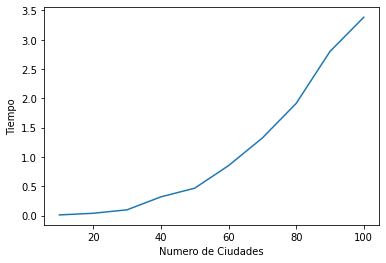

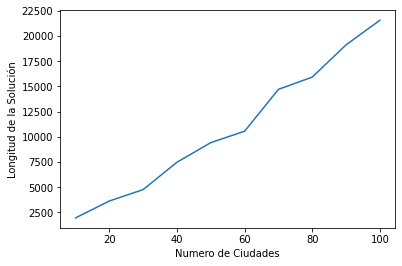

In [ ]:
def simAnnealing(datos,t0,tfinal):
    t=t0
    l=len(datos)
    ##Creamos una solucion aleatoria
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)
    #print("Longitud de la ruta: ", longitud)
    #print("Temperatura: ", t)

    it=0
    while t > tfinal:
        ##Obtenemos un vecino al azar
        vecino = obtenerVecino(solucion, datos)
        incremento = vecino[1]-longitud

        if incremento < 0:
            longitud = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            longitud = vecino[1]
            solucion = vecino[0]

        it+=1

        t=0.99*t
        #print("Longitud de la ruta: ", longitud)
        #print("Temperatura: ", t)
    return solucion, longitud

def main():
    t0=10
    Numero = []
    Tiempo = []
    Solucion = []
    #for i in range(15,60,5):
    for numeroCiudades in range(10,101,10):
    
      datos=generador(numeroCiudades)
      tini = time.time()
      s=simAnnealing(datos,10,0.05)
      tfin = time.time()
      tp = tfin - tini
      #print("--------------")
      #print("Num: ",50)
      #print("Tiempo: ", tp)
      #print("Solucion final: ",s[0])
      #print("Longitud de la ruta final: ",s[1])
      #print("")
      #print("")
      Numero.append(numeroCiudades)
      Tiempo.append(tp)
      Solucion.append(s[1])

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(Numero, Solucion)
    ax.set_ylabel("Longitud de la Solución")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()



if __name__ == "__main__":
    main()


Ejercicio 2 Busqueda Hiperparametros

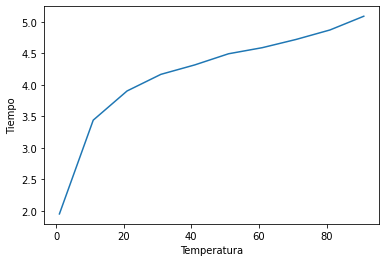

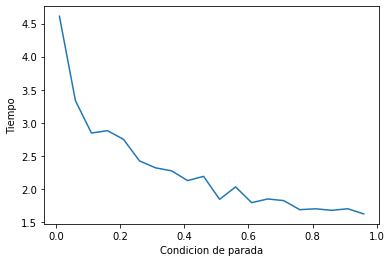

In [ ]:
def simAnnealing(datos,t0,tfinal):
    t=t0
    l=len(datos)
    ##Creamos una solucion aleatoria
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)
    #print("Longitud de la ruta: ", longitud)
    #print("Temperatura: ", t)

    it=0
    while t > tfinal:
        ##Obtenemos un vecino al azar
        vecino = obtenerVecino(solucion, datos)
        incremento = vecino[1]-longitud

        if incremento < 0:
            longitud = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            longitud = vecino[1]
            solucion = vecino[0]

        it+=1

        t=0.99*t
        #print("Longitud de la ruta: ", longitud)
        #print("Temperatura: ", t)
    return solucion, longitud

def main():
    t0=10
    Numero = []
    Tiempo = []
    #for i in range(15,60,5):
    for temperaturaInicial in range(1,101,10):
    

      datos=generador(100)
      tini = time.time()
      s=simAnnealing(datos,temperaturaInicial,0.05)
      tfin = time.time()
      tp = tfin - tini
      #print("--------------")
      #print("Num: ",50)
      #print("Tiempo: ", tp)
      #print("Solucion final: ",s[0])
      #print("Longitud de la ruta final: ",s[1])
      #print("")
      #print("")
      Numero.append(temperaturaInicial)
      Tiempo.append(tp)

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Temperatura")
    plt.show()
    Numero = []
    Tiempo = []

    for temperaturaFinal in range(1,101,5):
        datos=generador(100)
        tini = time.time()
        s=simAnnealing(datos,10,temperaturaFinal/100)
        tfin = time.time()
        tp = tfin - tini
        #print("--------------")
        #print("Num: ",50)
        #print("Tiempo: ", tp)
        #print("Solucion final: ",s[0])
        #print("Longitud de la ruta final: ",s[1])
        #print("")
        #print("")
        Numero.append(temperaturaFinal/100)
        Tiempo.append(tp)

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Condicion de parada")
    plt.show()


if __name__ == "__main__":
    main()


Funcion de Enfriamiento

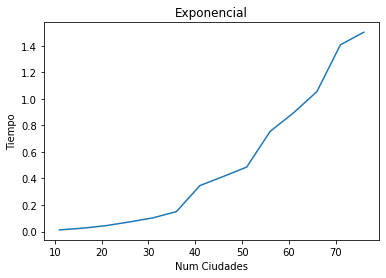

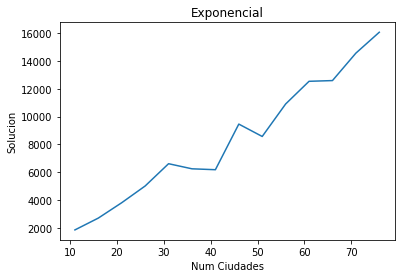

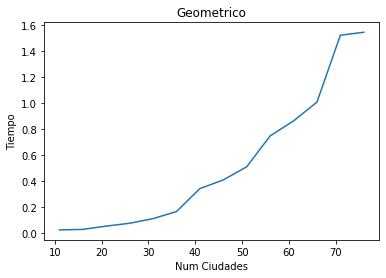

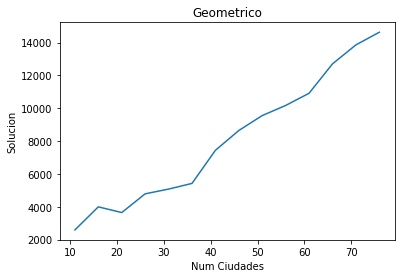

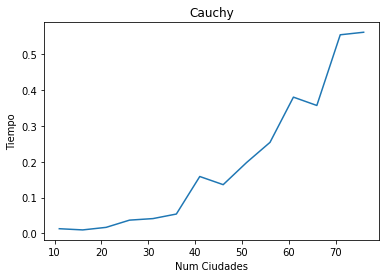

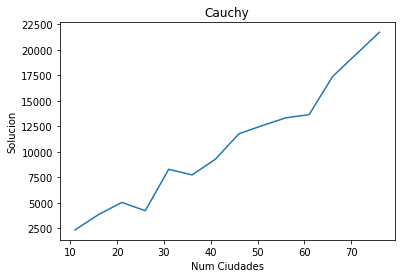

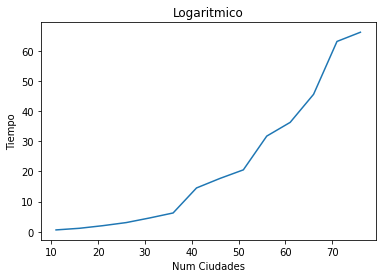

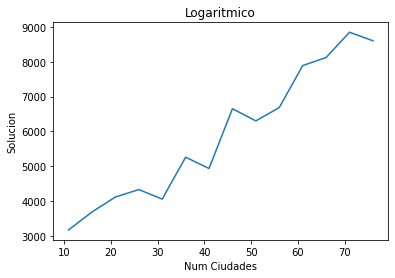

In [ ]:
def simAnnealing(datos,t0,tfinal,enfriamiento):
    t=t0
    l=len(datos)
    ##Creamos una solucion aleatoria
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)
    #print("Longitud de la ruta: ", longitud)
    #print("Temperatura: ", t)

    it=0
    while t > tfinal:
        ##Obtenemos un vecino al azar
        vecino = obtenerVecino(solucion, datos)
        incremento = vecino[1]-longitud

        if incremento < 0:
            longitud = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            longitud = vecino[1]
            solucion = vecino[0]

        it+=1

        #Funcion de enfriamiento
        alpha=0.99
        if(enfriamiento=="Exponencial"):
          t=alpha*t
        elif(enfriamiento=="Logaritmico"):
          alpha=0.05
          t=(alpha*t0)/math.log(1+it)

        elif(enfriamiento=="Geometrico"):
          t=(alpha**it)*t0

        elif(enfriamiento=="Cauchy"):
          t=t0/(1+it)
        
        #print("Longitud de la ruta: ", longitud)
        #print("Temperatura: ", t)
    return solucion, longitud

def main():
    t0=10

    Numero = []
    Tiempo = []
    funciones=["Exponencial","Geometrico","Cauchy","Logaritmico"]
    
    #for i in range(15,60,5):
    for y in funciones:
    
      Numero = []
      Tiempo = []
      Solucion = []
      for numeroCiudades in range(11,81,5):
      
        datos=generador(numeroCiudades)
        tini = time.time()
        s=simAnnealing(datos,10,0.05,y)
        tfin = time.time()
        tp = tfin - tini
        #print("--------------")
        #print("Num: ",numeroCiudades)
        #print("Tiempo: ", tp)
        #print("Solucion final: ",s[0])
        #print("Longitud de la ruta final: ",s[1])
        #print("")
        #print("")
        Numero.append(numeroCiudades)
        Tiempo.append(tp)
        Solucion.append(s[1])

      fig, ax = plt.subplots()
      ax.plot(Numero, Tiempo)
      ax.set_ylabel("Tiempo")
      ax.set_xlabel("Num Ciudades")
      ax.set_title(y)
      plt.show()

      fig, ax = plt.subplots()
      ax.plot(Numero, Solucion)
      ax.set_ylabel("Solucion")
      ax.set_xlabel("Num Ciudades")
      ax.set_title(y)
      plt.show()
      


if __name__ == "__main__":
    main()


Ejercicio 2 Mejorado

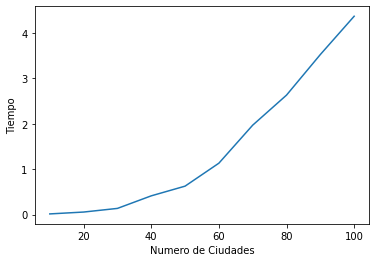

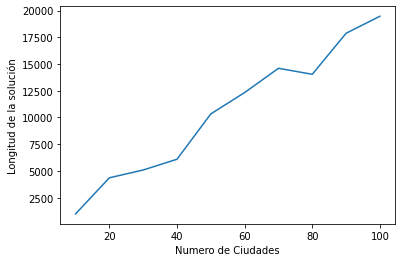

In [ ]:
def simAnnealing(datos,t0,tfinal):
    t=t0
    l=len(datos)
    ##Creamos una solucion aleatoria
    ciudades = list(range(l))
    solucion = []
    for i in range(l):
        ciudad = ciudades[random.randint(0, len(ciudades) - 1)]
        solucion.append(ciudad)
        ciudades.remove(ciudad)
    longitud = evaluarSolucion(datos, solucion)
    #print("Longitud de la ruta: ", longitud)
    #print("Temperatura: ", t)

    it=0
    while t > tfinal:
        ##Obtenemos un vecino al azar
        vecino = obtenerVecino(solucion, datos)
        incremento = vecino[1]-longitud

        if incremento < 0:
            longitud = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            longitud = vecino[1]
            solucion = vecino[0]

        it+=1
        if it%150==0:
          t=1.5*t
        t=0.99*t
        #print("Longitud de la ruta: ", longitud)
        #print("Temperatura: ", t)
    return solucion, longitud

def main():
    t0=10
    Numero = []
    Tiempo = []
    Solucion = []
    #for i in range(15,60,5):
    for numeroCiudades in range(10,101,10):
    
      datos=generador(numeroCiudades)
      tini = time.time()
      s=simAnnealing(datos,10,0.05)
      tfin = time.time()
      tp = tfin - tini
      #print("--------------")
      #print("Num: ",50)
      #print("Tiempo: ", tp)
      #print("Solucion final: ",s[0])
      #print("Longitud de la ruta final: ",s[1])
      #print("")
      #print("")
      Numero.append(numeroCiudades)
      Tiempo.append(tp)
      Solucion.append(s[1])

    fig, ax = plt.subplots()
    ax.plot(Numero, Tiempo)
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(Numero, Solucion)
    ax.set_ylabel("Longitud de la solución")
    ax.set_xlabel("Numero de Ciudades")
    plt.show()


if __name__ == "__main__":
    main()